## Introduction

Cardiovascular disease (CVD) remains a leading cause of global morbidity and mortality, emphasizing the need for effective preventive strategies. In recent years, machine learning (ML) has emerged as a powerful tool in the healthcare domain, offering innovative approaches to predict and manage cardiovascular risk. ML leverages advanced algorithms to analyze complex datasets, uncover patterns, and generate predictive models, thereby augmenting traditional risk assessment methods.

**Key Components of Machine Learning in Cardiovascular Disease Prediction:**

1. **Data Utilization:**
   - ML algorithms thrive on diverse and comprehensive datasets. Patient information, including demographics, medical history, lifestyle factors, and biomarkers, is fed into ML models to identify subtle relationships and patterns that might elude conventional analysis.

2. **Feature Selection:**
   - ML models automatically identify relevant features or variables that contribute significantly to the prediction of cardiovascular events. This aids in optimizing the model's performance and simplifies the interpretation of results.

3. **Algorithm Selection:**
   - Various ML algorithms, such as decision trees, random forests, support vector machines, and neural networks, are applied to cardiovascular datasets. The choice of algorithm depends on the nature and size of the dataset, as well as the specific objectives of the prediction task.

4. **Model Training and Validation:**
   - ML models undergo a training process where they learn from historical data to make predictions. Rigorous validation is essential to ensure the model's generalizability and robustness when applied to new, unseen data.

5. **Risk Stratification:**
   - ML contributes to personalized risk stratification by identifying individuals at higher risk of cardiovascular events. This enables healthcare professionals to tailor preventive interventions and allocate resources more efficiently.

6. **Early Detection:**
   - ML models excel in recognizing subtle patterns that may precede clinical manifestations of cardiovascular disease. Early detection allows for timely intervention and the implementation of preventive measures to mitigate the risk.

7. **Continuous Learning:**
   - ML models can adapt and improve over time as more data becomes available. Continuous learning ensures that predictive models stay relevant and accurate in dynamic healthcare environments.

**Challenges and Considerations:**

1. **Data Quality and Bias:**
   - The accuracy of ML predictions heavily relies on the quality and representativeness of the training data. Biases in the data, such as underrepresentation of certain demographic groups, can affect model performance.

2. **Interpretability:**
   - Some ML models, particularly complex ones like deep neural networks, are considered "black boxes," making it challenging to interpret how they arrive at specific predictions. Interpretable ML models are crucial for gaining the trust of healthcare professionals and patients.

3. **Ethical and Privacy Concerns:**
   - ML applications in healthcare must navigate ethical considerations related to patient privacy, consent, and the responsible use of sensitive health data. Adhering to stringent ethical guidelines is essential to foster trust in the adoption of ML-based predictive models.

In conclusion, machine learning holds significant promise in revolutionizing cardiovascular risk prediction. By leveraging the power of advanced algorithms and comprehensive datasets, ML contributes to more accurate, timely, and personalized assessments of cardiovascular risk, ultimately shaping the future of preventive cardiology.

### Data and Methods
This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, data.csv, with the following columns:

Person ID Gender Age Occupation Sleep Duration: Average number of hours of sleep per day Quality of Sleep: A subjective rating on a 1-10 scale Physical Activity Level: Average number of minutes the person engages in physical activity daily Stress Level: A subjective rating on a 1-10 scale BMI Category Blood Pressure: Indicated as systolic pressure over diastolic pressure Heart Rate: In beats per minute Daily Steps Sleep Disorder: One of None, Insomnia or Sleep Apnea Remarks on the data: The dataframe contains 374 rows and 13 columns, with no missing values or duplicate rows.Most of the numeric columns exhibit skewness,likely due to a significant number of outlier which totalled 15 .To prevent the loss of important information during analysis we retained these outliers.

#### Installing and importing libraries

In [1]:
import pandas as pd 
import mysql.connector as sql
import datasist as ds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### creating sql connection and connecting to database

In [2]:
#import data from SQL
conn = sql.connect(host= 'localhost' , 
                   user='root',
                   passwd='root',
                   use_pure=True,
                  database='cardio_data')
print(conn)

#### Read in file as dataframe

In [3]:
#read dataset as pandas dataframe
data = pd.read_sql_query('''SELECT * FROM cardio_data.cardio_data''', conn)

cardio_df = pd.DataFrame(data)
cardio_df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_21496\3358142953.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query('''SELECT * FROM cardio_data.cardio_data''', conn)


,id,Age,Gender,Height,Weight,Systolic,Diastolic,Cholesterol,Glucose,Smoke,Alcohol,Physical_Activity,CVD
0,0,18393,2,168,62,110,80,normal,normal,0,no,yes,0
1,1,20228,1,156,85,140,90,very high,normal,0,no,yes,1
2,2,18857,1,165,64,130,70,very high,normal,0,no,no,1
3,3,17623,2,169,82,150,100,normal,normal,0,no,yes,1
4,4,17474,1,156,56,100,60,normal,normal,0,no,no,0


#### Data cleaning

In [4]:
#checking for missing values

cardio_df.isna().sum()

#cleaning data columns

cardio_df['Gender'] = cardio_df['Gender'].replace({1:'Male', 2:'Female'})
cardio_df['Smoke'] = cardio_df['Smoke'].replace({0:'No', 1:'Yes'})
cardio_df['CVD'] = cardio_df['CVD'].replace({0:'No', 1:'Yes'})


cardio_df['Age'] = np.round(cardio_df['Age'] / 365).astype('int')
cardio_df = cardio_df.drop(['id'], axis=1)

#check for negative values in systolic and diastolic columns and convert to positive values
cardio_df['Systolic'] = cardio_df['Systolic'].astype('str')
cardio_df['Systolic'] = cardio_df['Systolic'].str.strip('-')
cardio_df['Systolic'] = cardio_df['Systolic'].astype('int')

cardio_df['Diastolic'] = cardio_df['Diastolic'].astype('str')
cardio_df['Diastolic'] = cardio_df['Diastolic'].str.strip('-')
cardio_df['Diastolic'] = cardio_df['Diastolic'].astype('int')

#handling outliers
cardio_df['Systolic'] = cardio_df['Systolic'].apply(lambda x: 200 if x > 200 else x)
cardio_df[cardio_df['Systolic'] > 200]
cardio_df['Systolic'] = cardio_df['Systolic'].apply(lambda x: 60 if x < 60 else x)
cardio_df[cardio_df['Systolic'] < 60]


cardio_df['Diastolic'] = cardio_df['Diastolic'].apply(lambda x: 50 if x < 50 else x)
cardio_df[cardio_df['Diastolic'] < 50]
cardio_df['Diastolic'] = cardio_df['Diastolic'].apply(lambda x: 180 if x > 180 else x)
cardio_df[cardio_df['Diastolic'] > 180]

cardio_df.head()

,Age,Gender,Height,Weight,Systolic,Diastolic,Cholesterol,Glucose,Smoke,Alcohol,Physical_Activity,CVD
0,50,Female,168,62,110,80,normal,normal,No,no,yes,No
1,55,Male,156,85,140,90,very high,normal,No,no,yes,Yes
2,52,Male,165,64,130,70,very high,normal,No,no,no,Yes
3,48,Female,169,82,150,100,normal,normal,No,no,yes,Yes
4,48,Male,156,56,100,60,normal,normal,No,no,no,No


#### Exploratory Data Analysis using Datasist Library

In [5]:
#brief data analysis
ds.structdata.describe(cardio_df)

First five data points


,Age,Gender,Height,Weight,Systolic,Diastolic,Cholesterol,Glucose,Smoke,Alcohol,Physical_Activity,CVD
0,50,Female,168,62,110,80,normal,normal,No,no,yes,No
1,55,Male,156,85,140,90,very high,normal,No,no,yes,Yes
2,52,Male,165,64,130,70,very high,normal,No,no,no,Yes
3,48,Female,169,82,150,100,normal,normal,No,no,yes,Yes
4,48,Male,156,56,100,60,normal,normal,No,no,no,No




Random five data points


,Age,Gender,Height,Weight,Systolic,Diastolic,Cholesterol,Glucose,Smoke,Alcohol,Physical_Activity,CVD
67623,49,Male,168,74,140,90,normal,normal,No,no,yes,Yes
39339,51,Male,160,72,120,80,normal,normal,No,no,yes,Yes
28296,50,Female,168,82,140,90,normal,normal,No,no,yes,Yes
69153,58,Male,157,70,130,70,very high,very high,No,no,no,Yes
16667,62,Female,170,89,120,80,normal,normal,No,no,no,Yes




Last five data points


,Age,Gender,Height,Weight,Systolic,Diastolic,Cholesterol,Glucose,Smoke,Alcohol,Physical_Activity,CVD
69995,53,Female,168,76,120,80,normal,normal,Yes,no,yes,No
69996,62,Male,158,126,140,90,high,high,No,no,yes,Yes
69997,52,Female,183,105,180,90,very high,normal,No,yes,no,Yes
69998,61,Male,163,72,135,80,normal,high,No,no,no,Yes
69999,56,Male,170,72,120,80,high,normal,No,no,yes,No




Shape of  data set: (70000, 12)


Size of  data set: 840000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Age,int32
Gender,object
Height,int64
Weight,int64
Systolic,int64
Diastolic,int64
Cholesterol,object
Glucose,object
Smoke,object
Alcohol,object




Numerical Features in Data set
['Age', 'Height', 'Weight', 'Systolic', 'Diastolic']


Categorical Features in Data set


['Gender',
 'Cholesterol',
 'Glucose',
 'Smoke',
 'Alcohol',
 'Physical_Activity',
 'CVD']



Statistical Description of Columns


,Age,Height,Weight,Systolic,Diastolic
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,164.359229,74.206214,126.854386,82.703229
std,6.765294,8.210126,14.395817,17.419102,14.960110
min,30.000000,55.000000,10.000000,60.000000,50.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,200.000000,180.000000




Description of Categorical Features


C:\Users\USER\anaconda3\envs\newpycaret\lib\site-packages\datasist\structdata.py:99: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  display(data.describe(include=[np.object, pd.Categorical]).T)
C:\Users\USER\anaconda3\envs\newpycaret\lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:
C:\Users\USER\anaconda3\envs\newpycaret\lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

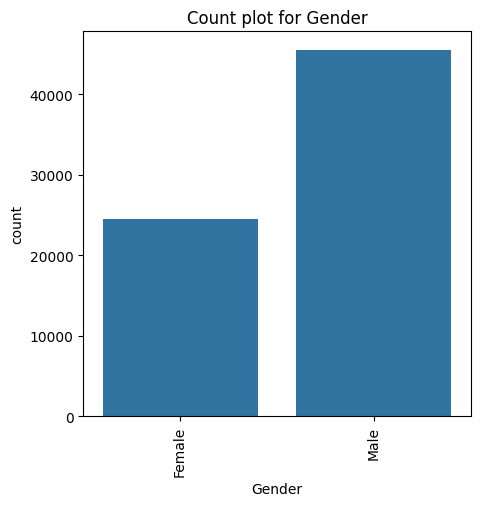

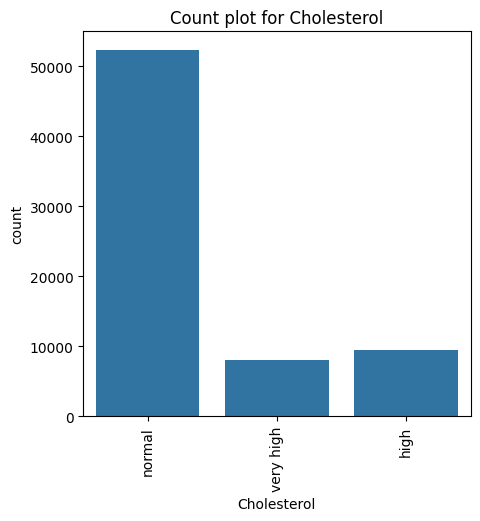

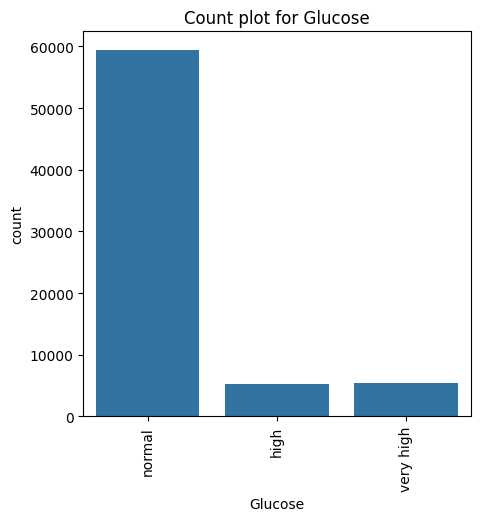

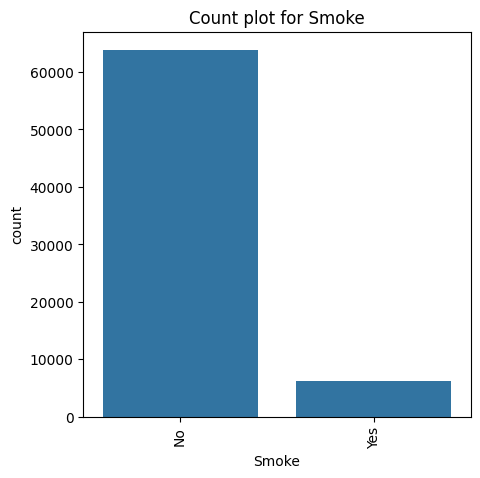

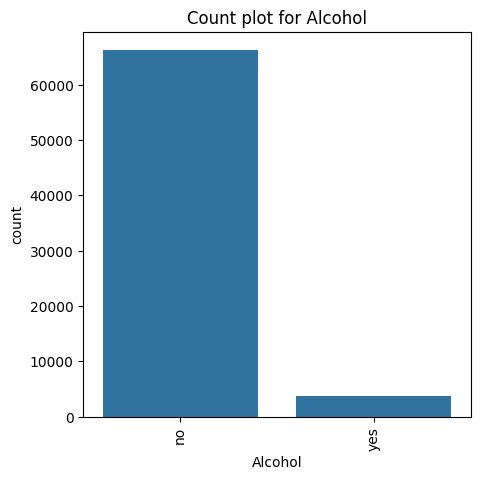

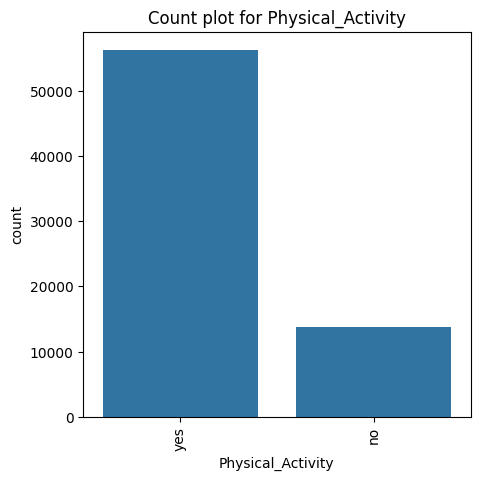

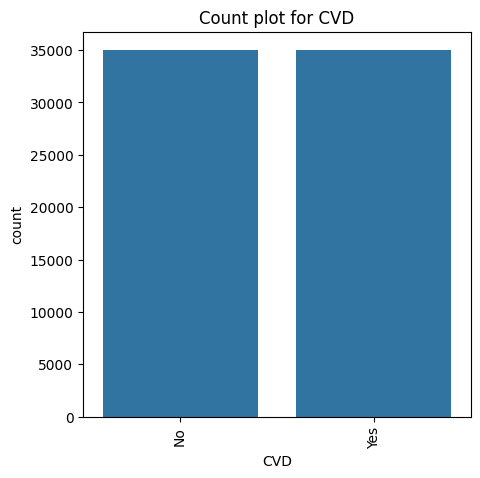

In [6]:
#data visualization
ds.visualizations.countplot(cardio_df)

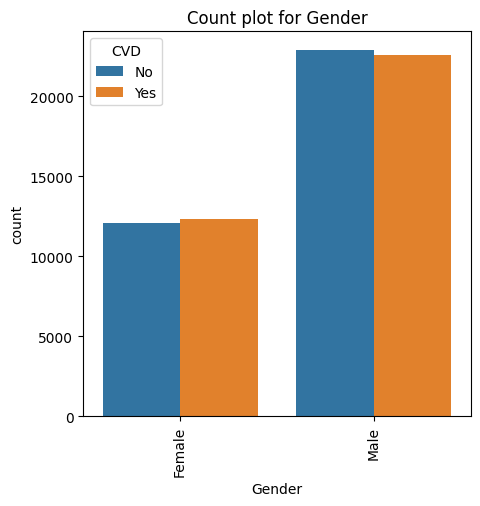

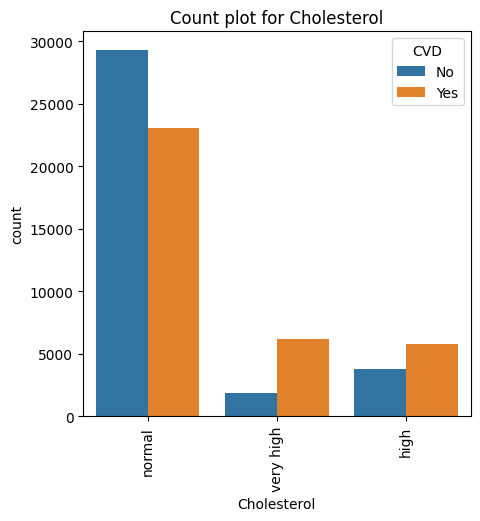

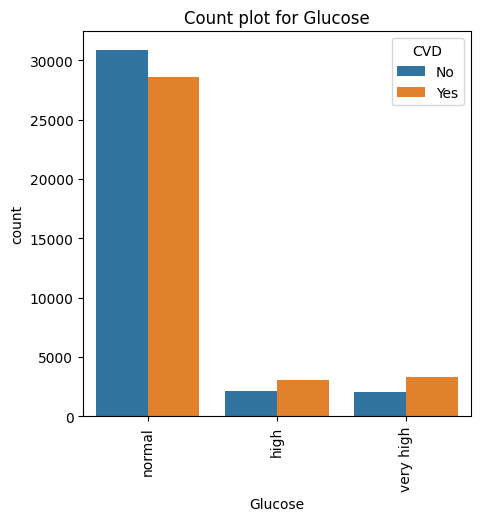

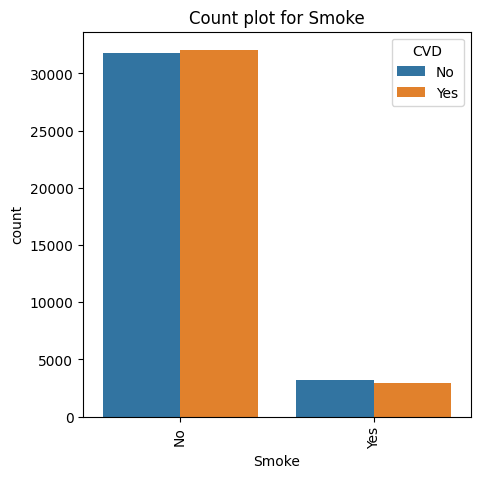

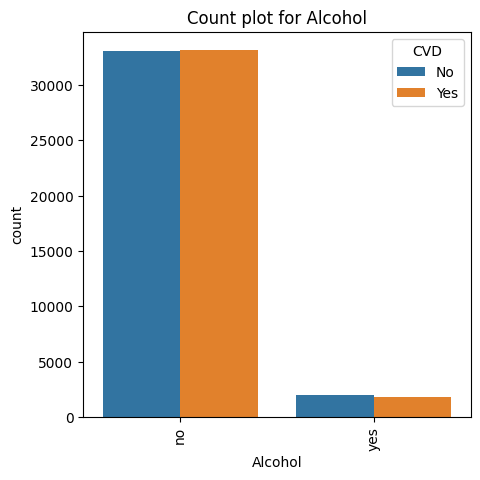

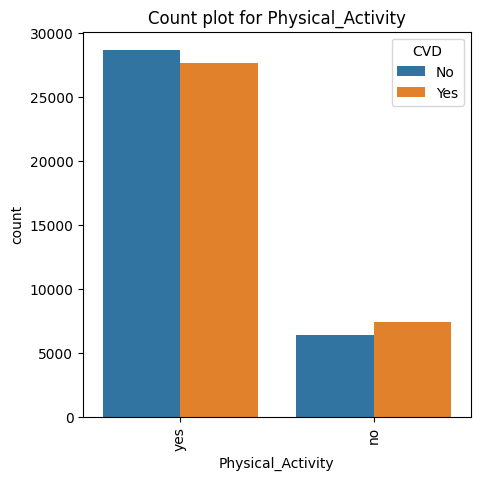

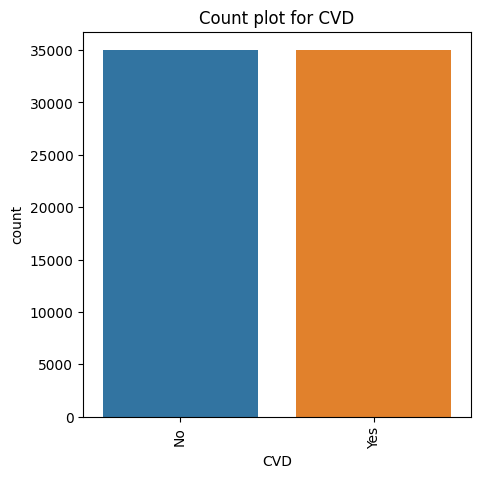

In [7]:
#data visualization
ds.visualizations.countplot(cardio_df, separate_by='CVD')

#### Feature Engineering

Feature Engineering is the process of using domain knowledge to select and transform feature from raw data before building a predictive model using machine learning.

In [8]:
#import libraries
import matplotlib as mpl
from pycaret.classification import *
mpl.rcParams['figure.dpi'] = 300

In [9]:
clf = setup(data=cardio_df, target="CVD",
            train_size=0.8, session_id=28, normalize=True)

,Description,Value
0,Session id,28
1,Target,CVD
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(70000, 12)"
5,Transformed data shape,"(70000, 16)"
6,Transformed train set shape,"(56000, 16)"
7,Transformed test set shape,"(14000, 16)"
8,Ordinal features,4
9,Numeric features,5


In [10]:
#compare best models

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7359,0.8013,0.7359,0.7372,0.7356,0.4718,0.4731,0.9810
gbc,Gradient Boosting Classifier,0.7346,0.8015,0.7346,0.7358,0.7343,0.4692,0.4704,3.2270
ada,Ada Boost Classifier,0.7288,0.7947,0.7288,0.7334,0.7274,0.4576,0.4622,1.5050
lr,Logistic Regression,0.7276,0.7901,0.7276,0.7304,0.7267,0.4551,0.4580,1.3710
ridge,Ridge Classifier,0.7243,0.0000,0.7243,0.7283,0.7231,0.4486,0.4526,0.5220
lda,Linear Discriminant Analysis,0.7243,0.7892,0.7243,0.7283,0.7231,0.4486,0.4526,0.4950
svm,SVM - Linear Kernel,0.7209,0.0000,0.7209,0.7277,0.7188,0.4418,0.4486,0.5970
rf,Random Forest Classifier,0.7027,0.7599,0.7027,0.7028,0.7027,0.4055,0.4055,4.3560
knn,K Neighbors Classifier,0.6952,0.7437,0.6952,0.6953,0.6952,0.3904,0.3905,3.7090
et,Extra Trees Classifier,0.6918,0.7344,0.6918,0.6918,0.6918,0.3836,0.3836,4.7860


In [11]:
model = create_model('lightgbm', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7370,0.8057,0.7370,0.7376,0.7368,0.4739,0.4746
1,0.7289,0.7968,0.7289,0.7305,0.7285,0.4578,0.4594
2,0.7362,0.7985,0.7362,0.7379,0.7358,0.4725,0.4741
3,0.7296,0.7979,0.7296,0.7305,0.7294,0.4593,0.4601
4,0.7334,0.7942,0.7334,0.7347,0.7330,0.4668,0.4680
5,0.7345,0.7994,0.7345,0.7359,0.7341,0.4689,0.4703
6,0.7370,0.8020,0.7370,0.7376,0.7368,0.4739,0.4745
7,0.7445,0.8107,0.7445,0.7452,0.7443,0.4889,0.4896
8,0.7441,0.8085,0.7441,0.7469,0.7434,0.4882,0.4910


In [12]:
#evaluate model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [13]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7390,0.8048,0.7390,0.7411,0.7384,0.4780,0.4800


,Age,Gender,Height,Weight,Systolic,Diastolic,Cholesterol,Glucose,Smoke,Alcohol,Physical_Activity,CVD,prediction_label,prediction_score
23055,44,Female,172,73,120,70,normal,normal,No,no,yes,No,No,0.8099
36122,52,Male,165,71,120,70,normal,normal,No,yes,yes,No,No,0.7611
6874,64,Male,158,66,120,80,very high,normal,No,no,yes,Yes,Yes,0.7943
54118,45,Male,153,76,150,90,very high,normal,No,no,yes,Yes,Yes,0.8748
23838,64,Male,165,79,140,80,normal,normal,No,no,yes,No,Yes,0.8787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35384,50,Male,165,74,160,100,high,high,No,no,yes,Yes,Yes,0.8511
65472,46,Male,167,89,150,100,normal,normal,No,no,yes,Yes,Yes,0.8734
11163,41,Male,157,68,120,70,normal,normal,No,no,yes,No,No,0.8671
10508,62,Female,168,55,160,80,normal,normal,Yes,no,yes,Yes,Yes,0.8573


In [14]:
#save the model
finalized_model = finalize_model(model)
save_model(finalized_model, "cardio_pred")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Height', 'Weight',
                                              'Systolic', 'Diastolic'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_